<a href="https://colab.research.google.com/github/Sangram-1409/AgriSmart/blob/main/KMean_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Kmean Sales.zip to Kmean Sales.zip


In [ ]:
import zipfile, os

zip_path = "Kmean Sales.zip"  # the file you uploaded
extract_dir = "Kmean_Sales_Data"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Files extracted to:", extract_dir)


✅ Files extracted to: Kmean_Sales_Data


In [ ]:
# Load dataset
df = pd.read_csv("Kmean Sales.zip", encoding='latin1')

# Display basic info
print(df.shape)
df.head()


(2823, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
# Check for null values
print(df.isnull().sum())

# Select only numeric columns for clustering
numeric_df = df.select_dtypes(include=[np.number])

# Fill NaN with 0 or mean (optional)
numeric_df = numeric_df.fillna(0)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

print("Data after scaling:")
print(scaled_data[:5])


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64
Data after scaling:
[[-1.64794709 -0.52289086  0.5969775  -1.05705871 -0.37082523 -1.42703863
  -1.39290889 -1.16517009 -0.14224584]
 [-1.4958875  -0.11220131 -0.11445035 -0.34701507 -0.42789707 -0.59624258
  -0.57233673 -1.16517009 -0.14224584]
 [-1.35468931  0.60650538  0.54938372 -1.05705871  0.17944282  0.23455347
  -0.02528862 -1.16517009 -0.14224584]
 [-

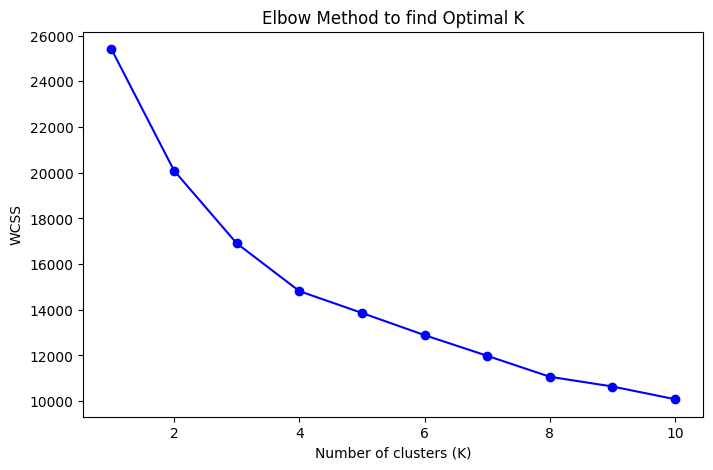

In [ ]:
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.title('Elbow Method to find Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Fit KMeans with the optimal K
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Display cluster info
df['Cluster'].value_counts()


,count
Cluster,
1,1183
2,907
0,733


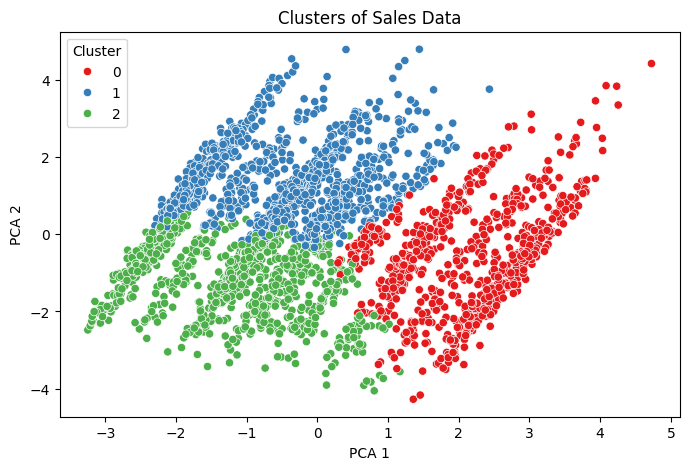

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)
x_pca = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,5))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=df['Cluster'], palette='Set1')
plt.title('Clusters of Sales Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [ ]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
cluster_summary


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
Cluster,,,,,,,,,
0,10333.005457,36.600273,86.857326,6.042292,3807.840723,1.328786,2.862210,2004.642565,103.562074
1,10234.437025,35.477599,97.894987,6.530008,4539.230541,3.330516,8.943364,2003.503804,125.788673
2,10230.373760,33.372657,62.504829,6.725469,2063.475050,3.040794,8.097023,2003.552370,65.712238
